<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Financial_Advisor_using__advanced_RAG_Implementaion_using_Mistral_AI__EnsembleRetriever__Embed_Caching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU langchain Faiss-gpu tiktoken sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00


In [2]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -qU trl Py7zr auto-gptq optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 87.5

In [4]:
# Base ctransformers with CUDA GPU acceleration
! pip install ctransformers[cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 66.0 MB/s eta 0:00:00


In [5]:
!pip install PyPdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.5/276.5 kB 6.1 MB/s eta 0:00:00


In [6]:
pip install rank_bm25

## Load Dataset

In [7]:
import os
os.mkdir("Data")

## Data Parsing using langchain

In [8]:
from langchain.document_loaders import PyPDFLoader,DirectoryLoader
#
dir_loader = DirectoryLoader("/content/Data",
                             glob="*.pdf",
                             loader_cls=PyPDFLoader)
docs = dir_loader.load()
#
print(f"len of documents in :{len(docs)}")

#



len of documents in :85


## Create Managebale pieces of text by using RecursiveCharacterTextSplitter to create chunks for reviews

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
#
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,
                                      chunk_overlap=200,)
#
esops_documents = text_splitter.transform_documents(docs)
print(f"number of chunks in barbie documents : {len(esops_documents)}")


number of chunks in barbie documents : 429


## Create Vectorstore

* Here we will leverage a CacheBackedEmbeddings to prevent us from reembedding similar queries over and over again.
* Structured documents will be passed into a usesful format for querying ,retrieving and use in LLM application
* here we will use FAISS(Facebook AI similarity search) as the vectorstore.

In [11]:
from langchain.embeddings import CacheBackedEmbeddings,HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore
from langchain.retrievers import BM25Retriever,EnsembleRetriever

In [12]:
store = LocalFileStore("./cache/")
#embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'
#changed the embedding model
embed_model_id = 'BAAI/bge-small-en-v1.5'
core_embeddings_model = HuggingFaceEmbeddings(model_name=embed_model_id)
embedder = CacheBackedEmbeddings.from_bytes_store(core_embeddings_model,
                                                  store,
                                                  namespace=embed_model_id)

## Create Vectorstore

In [13]:
vectorstore = FAISS.from_documents(esops_documents,embedder)

In [48]:
list(store.yield_keys())

['BAAI/bge-small-en-v1.5e0c271cf-8c99-5bb5-9900-e7a654d83ad3',
 'BAAI/bge-small-en-v1.52922389f-e08c-534f-acab-26deac6b9772',
 'BAAI/bge-small-en-v1.594a15616-eae1-5804-8195-c32ea5d98c93',
 'BAAI/bge-small-en-v1.5b5e99d4c-9f2f-59b4-b307-cf79ea1edeee',
 'BAAI/bge-small-en-v1.52b2c8752-622f-5404-b348-05edd6d1a1a7',
 'BAAI/bge-small-en-v1.5029058df-eaa9-5ba6-bba9-902992943534',
 'BAAI/bge-small-en-v1.5d9bd34b5-9f75-507e-b4aa-a0765c09babc',
 'BAAI/bge-small-en-v1.59fe78e3d-ba93-56ed-ae9a-60dbb2f6baa6',
 'BAAI/bge-small-en-v1.5e084c94c-3a23-5fbd-9a3f-439f79766589',
 'BAAI/bge-small-en-v1.506769ae3-712e-5b18-8a00-9d164627a862',
 'BAAI/bge-small-en-v1.5f398c949-b40f-5a2f-97c2-ea75bfa96ff9',
 'BAAI/bge-small-en-v1.56e609120-cf42-52aa-b144-ed170b4f3060',
 'BAAI/bge-small-en-v1.5800812dc-5bee-50d4-ac6b-ec59f2ad33e5',
 'BAAI/bge-small-en-v1.5e121e6d9-1e81-528e-9df2-86d5271325e5',
 'BAAI/bge-small-en-v1.5335e0569-4624-5f4f-8421-470558feca52',
 'BAAI/bge-small-en-v1.5c890d074-7b93-5693-8bb9-c33f58c

## Create Sparse Embedding

In [14]:
bm25_retriever = BM25Retriever.from_documents(esops_documents)

In [15]:
bm25_retriever.k=5

## Embed Query - bge-small-en-v1.5

In [16]:
query = "Ho to save my excess money?"
embedding_vector = core_embeddings_model.embed_query(query)
len(embedding_vector)

384

## Retrieve passages from the vectorstore that are similar to the query

In [17]:
docs_resp = vectorstore.similarity_search_by_vector(embedding_vector,k=5)

## Retrieved - content -  bge-small-en-v1.5 embedding

In [18]:
for page in docs_resp:
  print(page.page_content)
  print("\n")

looking at how you could make your money grow if you de -
cided to spend less on other things and save those extra dollars.
If you buy on impulse, make a rule that you’ll always wait 
24 hours to buy anything. Y ou may lose your desire to buy it 
after a day. And try emptying your pockets and wallet of spare 
change at the end of each day.  Y ou’ll be surprised how quickly 
those nickels and dimes add up!
PAY OFF CREDIT CARD OR OTHER HIGH  
INTEREST DEBT


keep pace with an 18 percent interest charge. That’s why you’re 
better off eliminating all credit card debt before investing savings. 
Once you’ve paid off your credit cards, you can budget your 
money and begin to save and invest. Here are some tips for 
avoiding credit card debt:
Put Away the Plastic
 Don’t use a credit card unless your debt is at a manageable level and 
you know you’ll have the money to pay the bill when it arrives.
Know What You Owe


Add up your total retirement savings, both at


first pay down the card that c

## Check to see  how much time CacheBackedEmbeddings pattern saves us

In [19]:
%%timeit -n 1 -r 1
query = "How to save my excess money?"
#
embedding_vector = core_embeddings_model.embed_query(query)
docs_resp = vectorstore.similarity_search_by_vector(embedding_vector,k=5)

21.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Setup Ensemble Retriever (Hybrid Search)

In [20]:
faiss_retriever = vectorstore.as_retriever(search_kwargs={"k":5})
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever,faiss_retriever],
                                       weights=[0.5,0.5])

## Building a retrieval chain

#### Initialize LLM using a quantized GPTQ Model

In [21]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
# To use a different branch, change revision
# For example: revision="gptq-4bit-32g-actorder_True"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="gptq-8bit-32g-actorder_True")
#
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


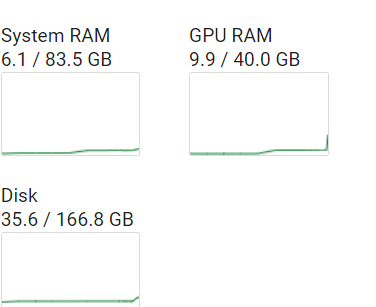

In [24]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    do_sample=True,
    temperature=0.1,
    top_p=0.95,
    top_k=40,
    repetition_penalty=1.1
)

In [25]:
from langchain.llms import HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=pipe)

## Caching

In [27]:
import langchain
from langchain.cache import InMemoryCache
langchain.llm_cache = InMemoryCache()

## Setup Retrieval chain - without Hybrid Search

In [22]:
from langchain import PromptTemplate
PROMPT_TEMPLATE = '''
You are my financial advisor. You are great at providing tips on investments, savings and on financial markets with your knowledge in finances.
With the information being provided try to answer the question.
If you cant answer the question based on the information either say you cant find an answer or unable to find an answer.
So try to understand in depth about the context and answer only based on the information provided. Dont generate irrelevant answers

Context: {context}
Question: {question}
Do provide only helpful answers

Helpful answer:
'''
#
input_variables = ['context', 'question']
#
custom_prompt = PromptTemplate(template=PROMPT_TEMPLATE,
                            input_variables=input_variables)

In [44]:
from langchain.schema import prompt
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
#
handler = StdOutCallbackHandler()
#
qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever = vectorstore.as_retriever(search_kwargs={"k":5}),
    verbose=True,
    callbacks=[handler],
    chain_type_kwargs={"prompt": custom_prompt},
    return_source_documents=True
)

## Provide the user query

In [30]:
%%time
query = "How to save my excess money?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")




> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(



> Finished chain.
Response generated : 
 
To save your excess money, you can consider the following steps:

1. Set a budget: Determine how much money you can afford to save each month and stick to it.
2. Automate your savings: Set up automatic transfers from your checking account to your savings account.
3. Pay off high-interest debt: Interest payments can eat away at your savings over time, so it's important to pay off any high-interest debt as soon as possible.
4. Invest in low-cost index funds: Index funds are a simple and cost-effective way to invest in the stock market.
5. Increase your income: Consider taking on a part-time job or negotiating a raise at your current job to increase your income.
6. Reduce expenses: Look for ways to cut back on discretionary spending, such as dining out or buying new clothes.
7. Use cashback rewards: Utilize cashback rewards from credit cards or shopping websites to earn additional income.
8. Monitor your progress: Regularly review your savings pr

In [31]:
%%time
query = "What are the steps to make a financial planning?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
To make a financial plan, follow these steps:

1. Determine your short-term and long-term financial goals.
2. Calculate your current net worth.
3. Identify your sources of income and expenses.
4. Create a budget that includes all of your income and expenses.
5. Set aside money for emergency funds and unexpected expenses.
6. Determine how much you can realistically save and invest each month.
7. Choose investment options that align with your financial goals and risk tolerance.
8. Review and adjust your financial plan regularly to ensure that you are on track to meet your goals.
Source Documents : 
 [Document(page_content='Make your own list and then think about which goals are the \nmost important to you. List your most important goals first. \nDecide how many years you have to meet each specific goal, \nbecause when you save or invest you’ll need to find a savings or \nYOUR FINANCIAL GOALS\nIf you don’t kn

## LLM Caching applied as the context of the question is the same.

In [32]:
%%time
query = "Please explain in detail the steps to make a financial planning."
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
Financial planning is a process of setting goals, analyzing your current financial situation, creating a plan to meet those goals, and implementing that plan. Here are the steps to create a financial plan:

1. Set your goals: Start by identifying your short-term, medium-term, and long-term financial goals. These could include saving for a vacation, buying a house, paying off debt, funding education, or planning for retirement. Be sure to write down each goal in Worksheet 1 – Goals and Priorities in the back of this booklet.
2. Assess your current financial situation: Determine your current income, expenses, assets, and liabilities. This will help you understand where you stand financially and identify areas where you may need to make changes.
3. Create a spending plan: Develop a spending plan that aligns with your goals and takes into account your income and expenses. This plan should help you allocate fun

In [43]:
%%time
query ="How to plan for retirement while still young?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(



> Finished chain.
Response generated : 
 
To plan for retirement while still young, it's important to start early and make regular contributions to a retirement plan. This can help ensure that you have enough savings to support your desired lifestyle during retirement. Additionally, it's important to consider factors such as inflation and potential changes in market conditions when planning for retirement. It may also be helpful to consult with a financial advisor to develop a personalized retirement plan that takes into account your individual financial situation and goals.
Source Documents : 
 [Document(page_content='Fortunately, there are steps you can still take to \nbuild your retirement strength.\nTake a job with a plan\nIf two jobs offer similar pay and working \nconditions, the job that offers retirement benefits may be the better choice.\nStart your own plan\nIf you can’t join a company plan, you can save \non your own. You can’t put away as much as on a tax-deferred basis an

In [45]:
%%time
query ="How to estimate the retirement income?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 To estimate your retirement income, you need to consider both your sources of retirement savings and your expected expenses during retirement. Here's how to do it:

1. Calculate your total retirement savings by adding up all your individual and employer contributions to your retirement plans, such as a 401(k), IRA, or Roth IRA.
2. Determine your expected expenses during retirement, including living expenses, healthcare costs, travel expenses, and any other discretionary spending.
3. Estimate your sources of retirement income, such as Social Security benefits, pension payments, annuity income, and investment returns.
4. Subtract your expected expenses from your total retirement savings to determine your net retirement income.
5. Adjust your retirement income plan as needed to ensure that you have enough income to cover your expenses and maintain your desired lifestyle during retirement.

It's important to no

## Setup Retrieval chain - with Hybrid Search

In [46]:
##Ensemble Retriever
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
#
handler = StdOutCallbackHandler()
#
qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever = ensemble_retriever,
    callbacks=[handler],
    chain_type_kwargs={"prompt": custom_prompt},
    return_source_documents=True
)

In [34]:
%%time
query = "How to save my excess money?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
The best way to save money is to automate the process. Set up automatic transfers from your checking account to your savings account. This ensures that you consistently save money without having to think about it. Additionally, consider setting up automatic contributions to your retirement accounts. This will ensure that you consistently contribute towards your retirement goals without having to remember to make payments.

Another helpful tip is to create a budget and stick to it. By tracking your expenses and identifying areas where you can cut back, you can free up additional funds to save. It's also important to prioritize your spending and focus on needs rather than wants. By doing so, you can reduce unnecessary expenses and allocate more funds towards your savings goals.

Lastly, consider finding ways to earn more money. This could include taking on a side hustle, negotiating a raise at work, or inves

In [35]:
%%time
query = "What are the steps to make a financial planning?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
To make a financial plan, follow these steps:

1. Determine your financial goals: Write down your short-term and long-term financial goals, such as paying off debt, saving for a vacation, buying a house, or retiring comfortably.
2. Calculate your current financial situation: Determine your current income, expenses, assets, and liabilities. This will give you an idea of where you stand financially and help you identify areas where you need to improve.
3. Set a timeline: Estimate how long it will take you to achieve each of your financial goals, based on your current financial situation and your expected income and expenses in the future.
4. Create a budget: Based on your estimated income and expenses, create a budget that helps you allocate funds towards your financial goals. This should include both discretionary and non-discretionary spending.
5. Choose investment strategies: Determine the types of invest

In [36]:
%%time
query = "Please explain in detail the steps to make a financial planning."
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
Financial planning is a process of setting goals, analyzing your current financial situation, developing strategies, and implementing actions to achieve those goals. Here are some general steps to consider:

1. Set clear, realistic goals: Determine what you want to achieve financially, both short-term and long-term. Make sure your goals are specific, measurable, attainable, relevant, and timely (SMART).
2. Assess your current financial situation: Gather information about your income, expenses, assets, liabilities, and net worth. This will help you understand where you stand financially and identify areas for improvement.
3. Develop a spending plan: Create a budget that outlines your expected income and expenses. Allocate funds towards your goals while ensuring you have enough for necessities and emergencies.
4. Analyze your risk tolerance and investment options: Understand how much risk you're comfortable 

* In the example below Caching is applied. Here since the query has been asked earlier, the response is served from the cache.There is a reduction in response time

In [37]:
%%time
query = "What are the steps to make a financial planning?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
To make a financial plan, follow these steps:

1. Determine your financial goals: Write down your short-term and long-term financial goals, such as paying off debt, saving for a vacation, buying a house, or retiring comfortably.
2. Calculate your current financial situation: Determine your current income, expenses, assets, and liabilities. This will give you an idea of where you stand financially and help you identify areas where you need to improve.
3. Set a timeline: Estimate how long it will take you to achieve each of your financial goals, based on your current financial situation and your expected income and expenses in the future.
4. Create a budget: Based on your estimated income and expenses, create a budget that helps you allocate funds towards your financial goals. This should include both discretionary and non-discretionary spending.
5. Choose investment strategies: Determine the types of invest

In [38]:
%%time
query = "How money works for us ?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
There are two main ways to make money: working for it or having it work for you. The latter involves saving or investing your money, which can earn interest or dividends over time. It's important to diversify your investments to minimize risk and maximize potential returns. Additionally, it's crucial to have an emergency fund to cover unexpected expenses before diving into long-term investments.
Source Documents : 
 [Document(page_content='10  |  SAVING AND INVESTINGMaking Money Grow\nTHE TWO WAYS TO MAKE MONEY\nThere are basically two ways to make money.\n1. You work for money.\n  Someone pays you to work for them or you have your own \nbusiness.\n2. Your money works for you.\n Y ou take your money and you save or invest it.\nYOUR MONEY CAN WORK FOR YOU IN TWO WAYS\nYour money earns money.  When your money goes to work, \nit may earn a steady paycheck. Someone pays you to use your \nmoney for a period of 

In [39]:
%%time
query ="What is the document about?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
The document is a guide to financial fitness and helps individuals assess their financial situation and plan for their future. It includes information on various financial topics such as budgeting, saving, investing, taxes, and insurance. The guide provides checklists and worksheets to help individuals gather necessary documents and make informed decisions about their financial future.
Source Documents : 
 [Document(page_content='❏Other\n❏Copy of recent credit report\nInsurance Documents and Statements\n❏Health, disability, and long term care insurance policies\n❏Homeowners, renters, auto, and umbrella insurance policies \n❏Life insurance policies \n❏Other', metadata={'source': '/content/Data/savings-fitness.pdf', 'page': 39}), Document(page_content='14  |  SAVING AND INVESTINGWhat are investments all about?\nWhen you make an investment, you are giving your money \nto a company or enterprise, hoping that i

In [40]:
%%time
query ="How to begin the savings fitness plan?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 To begin your savings fitness plan, start by setting a savings goal. This could be a specific amount of money you want to save for retirement or a general goal of building wealth over time. Once you have a clear idea of what you want to achieve, create a budget and identify areas where you can cut back on spending to free up more money for savings. It’s also important to educate yourself about different investment options and choose the ones that align with your risk tolerance and long-term financial goals. Finally, consider working with a financial advisor to help you develop a comprehensive financial plan and stay on track as you work towards your savings fitness goals.
Source Documents : 
 [Document(page_content='The worksheets in the back of the booklet \ncan help you begin your savings fitness plan. Interactive versions of the \nworksheets  are also \navailable online.\nYes, retirement is a big purchas

In [41]:
%%time
query ="How to plan for retirement while still young?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 
It's important to start planning for retirement as early as possible, even when you're still young. This is because the longer you have to save and invest, the more time your money has to grow through compound interest. Additionally, many employers offer matching contributions to retirement plans, which can significantly boost your savings over time. It's also important to consider other factors such as inflation and taxes when planning for retirement.
Source Documents : 
 [Document(page_content='first pay down the card that charges the highest rate. Pay as much \nas you can toward that debt each month until your balance is once \nagain zero, while still paying the minimum on your other cards.\nThe same advice goes for any other high interest debt (about 8% or \nabove) which does not offer the tax advantages of, for example, a mortgage.\nNow, once you have paid off those credit cards and begun to \nset asi

In [47]:
%%time
query ="How to estimate the retirement income?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
 To estimate your retirement income, you need to consider all sources of income that you will have during retirement. This includes Social Security benefits, pension payments, annuity payments, rental income, investment returns, and any other sources of income. You can use the Social Security Administration's website to get an estimate of your retirement benefits based on your work history and age. You can also use online calculators or financial planners to estimate your retirement income based on your expected expenses, investment returns, and other factors. It's important to regularly review and update your retirement income estimate as your circumstances change and as market conditions fluctuate.
Source Documents : 
 [Document(page_content='Enter the result from Step 1 on the first line. Then enter the number of years you think you will \nspend in retirement. Select a projected income factor from the box